<a href="https://colab.research.google.com/github/kellyslpang/unpackAIworkbooks/blob/main/PaintingsGenre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from IPython.display import Image, display
from fastbook import *
from fastai.vision.widgets import *


     |████████████████████████████████| 727kB 9.2MB/s 
     |████████████████████████████████| 1.2MB 18.9MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 204kB 49.3MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
Mounted at /content/gdrive


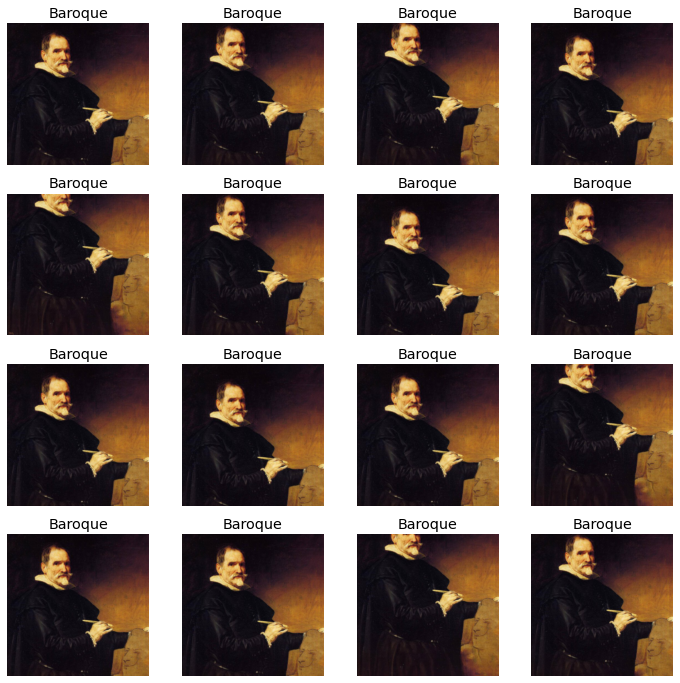

In [ ]:
#!ls gdrive/MyDrive/ai/ds1/
path = Path('gdrive/MyDrive/ai/Genre')
paintings = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(256))
#    item_tfms=RandomResizedCrop(256, min_scale=0.3))
#    batch_tfms=aug_transforms())
dls = paintings.dataloaders(path)
#dls.valid.show_batch(max_n=4, nrows=1)
dls.train.show_batch(max_n=16, nrows=4, unique=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


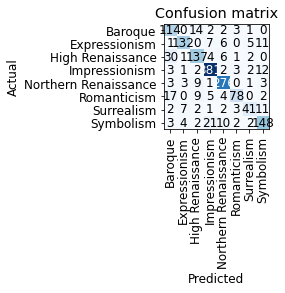

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(10, nrows=10)


**Classify paintings by genre**
Resize 256

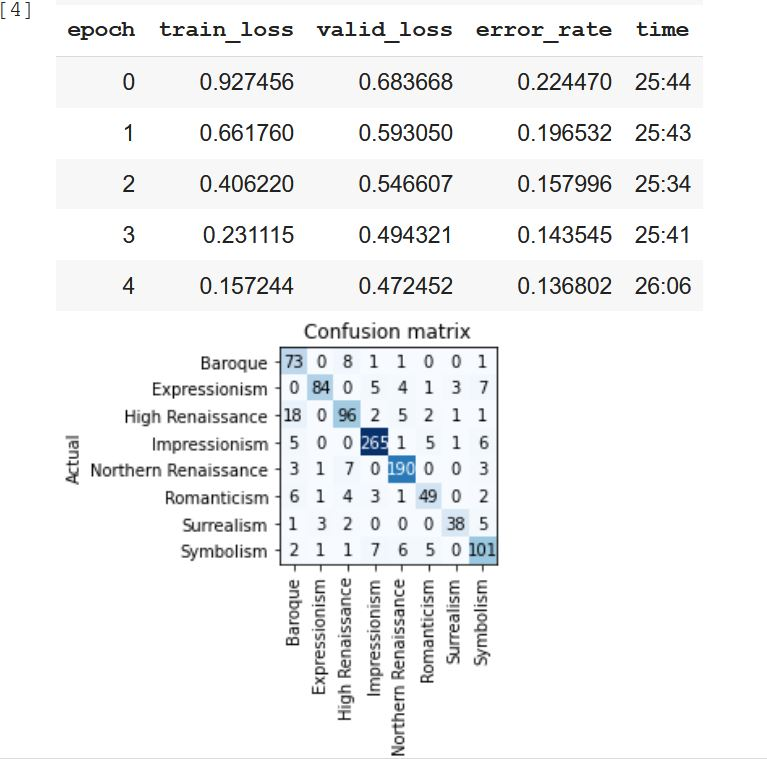

**Classify paintings by genre** RandomResizeCrop 256
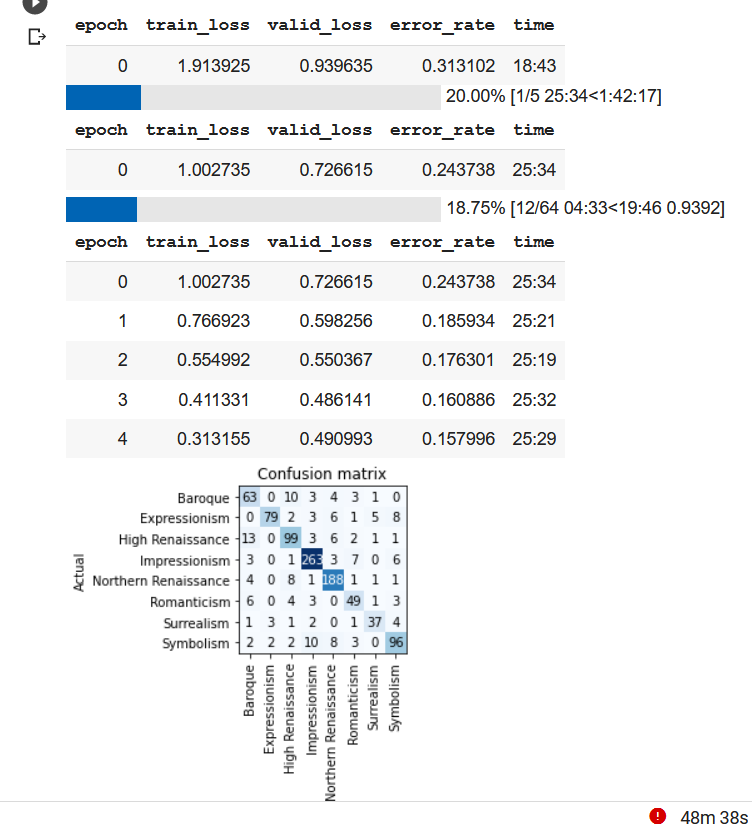

In [ ]:
learn.export('./gdrive/MyDrive/ai/Genre/PaintingGenreRanResizeCrop256.pkl')

In [ ]:
parapath = Path('gdrive/MyDrive/ai/')
parapath.ls(file_exts='.pkl')

(#1) [Path('gdrive/MyDrive/ai/RCrop512IMPvsBAR.pkl')]

In [ ]:
learn_inf = load_learner(parapath/'RCrop512IMPvsBAR.pkl')


gdrive/MyDrive/ai/test/Bernini02.jpg


('Baroque', tensor(0), tensor([1.0000e+00, 7.2306e-10]))


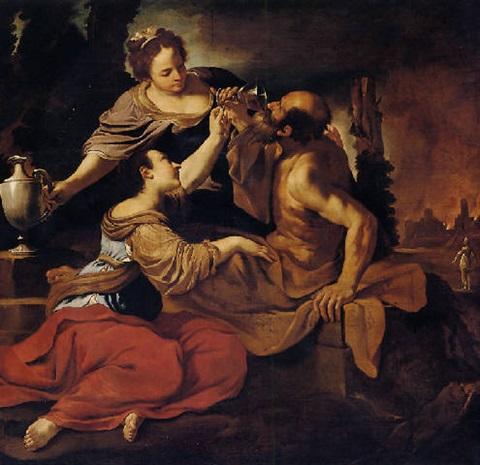



gdrive/MyDrive/ai/test/Renoir02.jpg


('Impressionist', tensor(1), tensor([0.0331, 0.9669]))


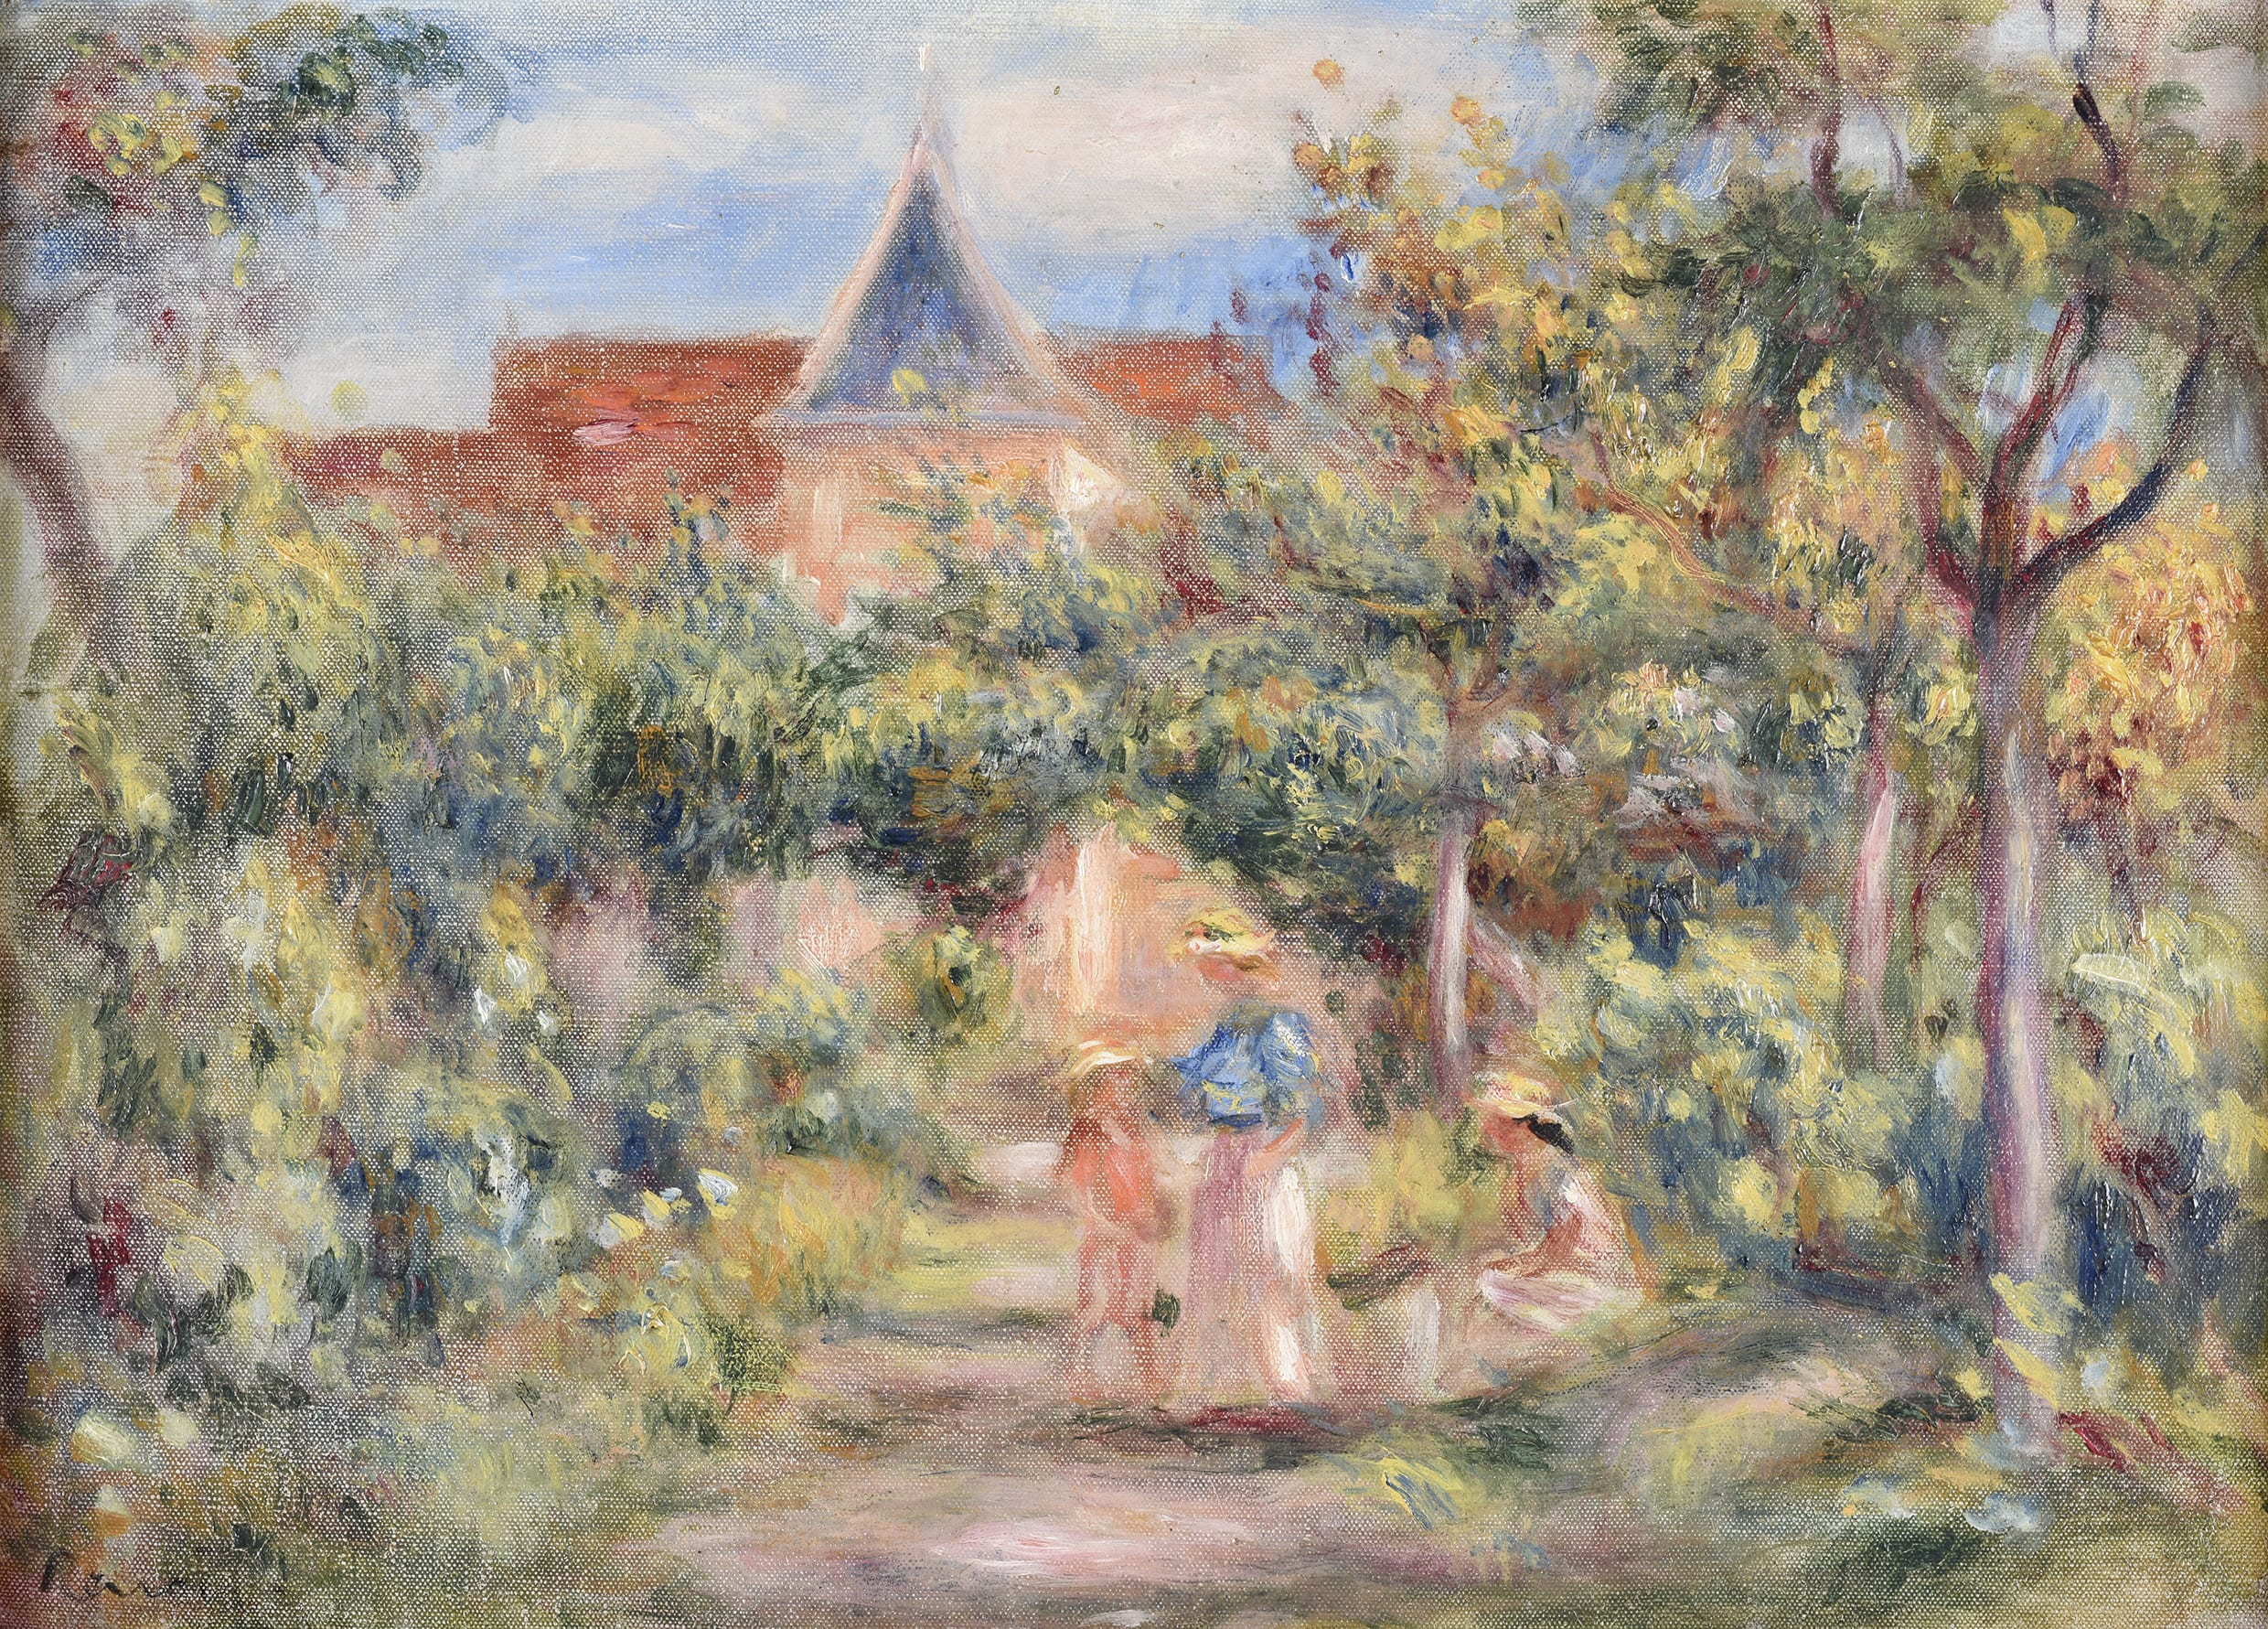



gdrive/MyDrive/ai/test/Velazquez04.jpg


('Baroque', tensor(0), tensor([9.9991e-01, 8.6339e-05]))


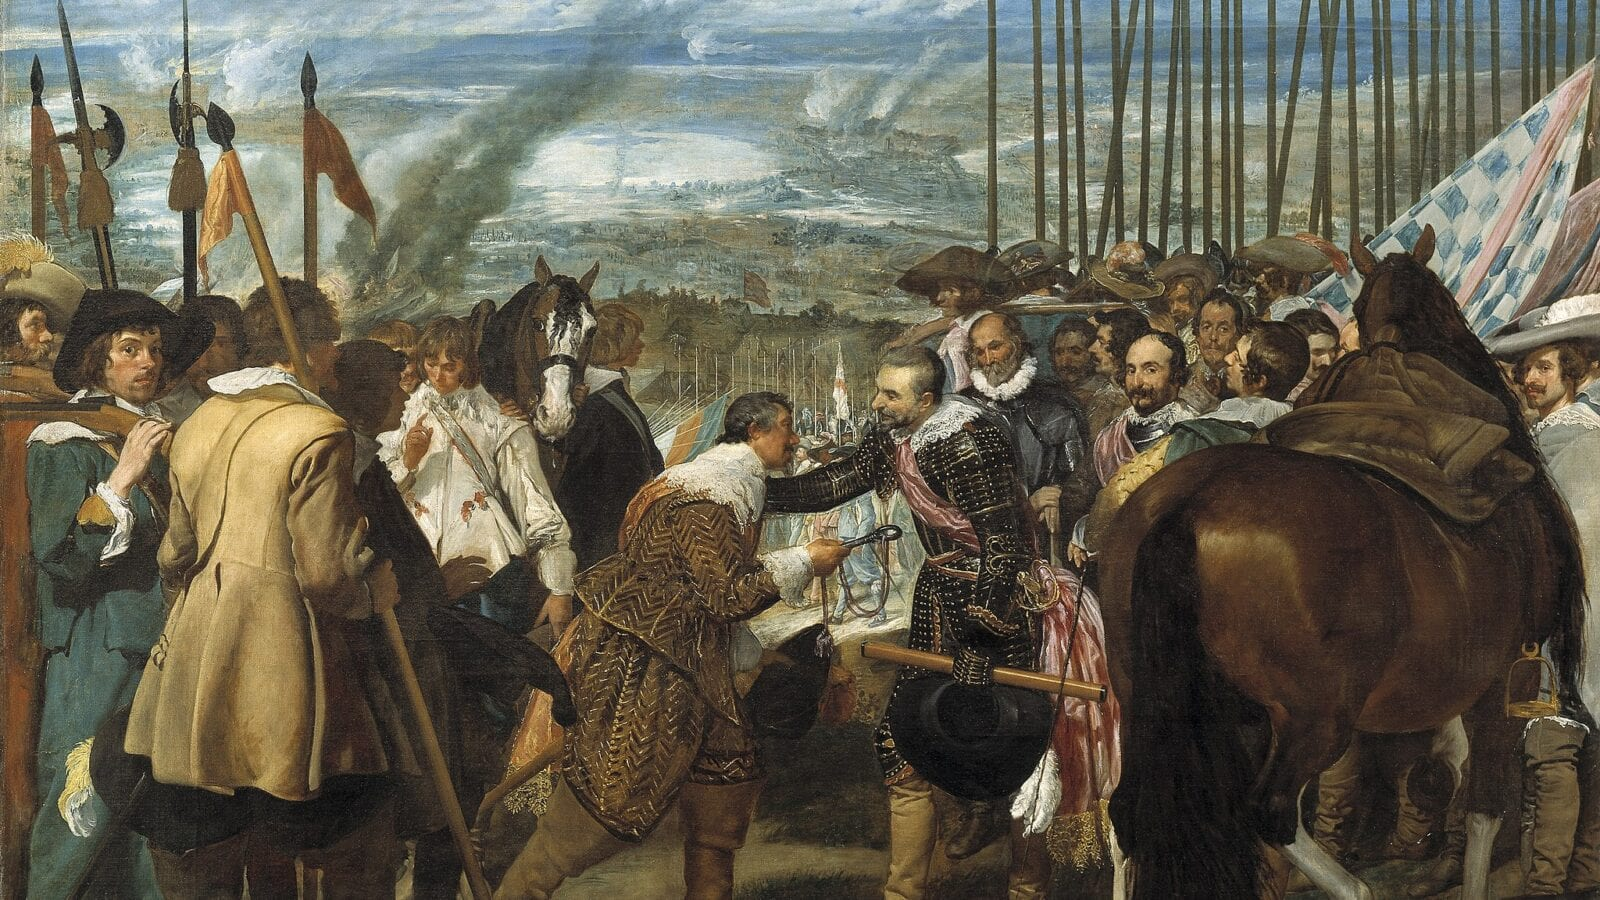



gdrive/MyDrive/ai/test/Bernini01.jpg


('Baroque', tensor(0), tensor([1.0000e+00, 1.1988e-08]))


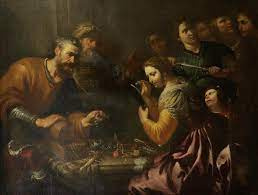



gdrive/MyDrive/ai/test/Velazquez03.jpg


('Baroque', tensor(0), tensor([9.9999e-01, 1.2478e-05]))


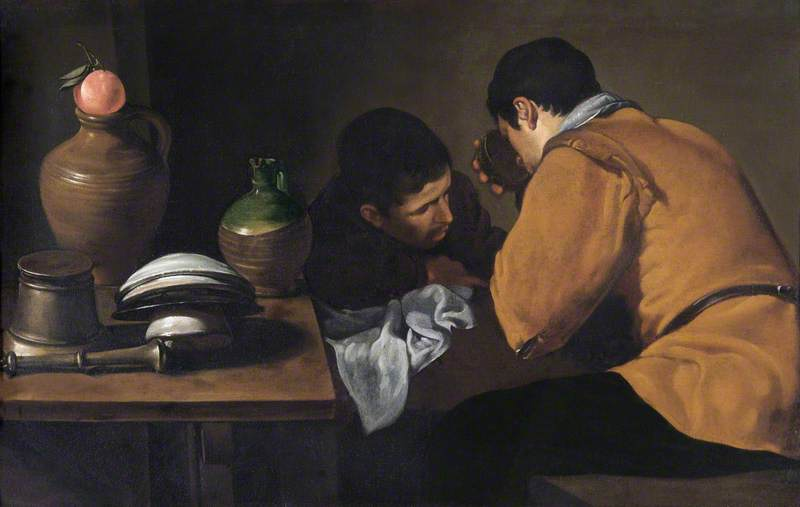



gdrive/MyDrive/ai/test/Velazquez02.jpg


('Baroque', tensor(0), tensor([9.9999e-01, 1.1385e-05]))


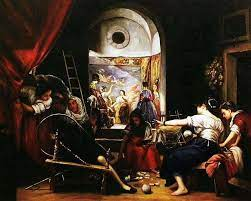



gdrive/MyDrive/ai/test/Cezanne03.jpg


('Impressionist', tensor(1), tensor([7.0648e-05, 9.9993e-01]))


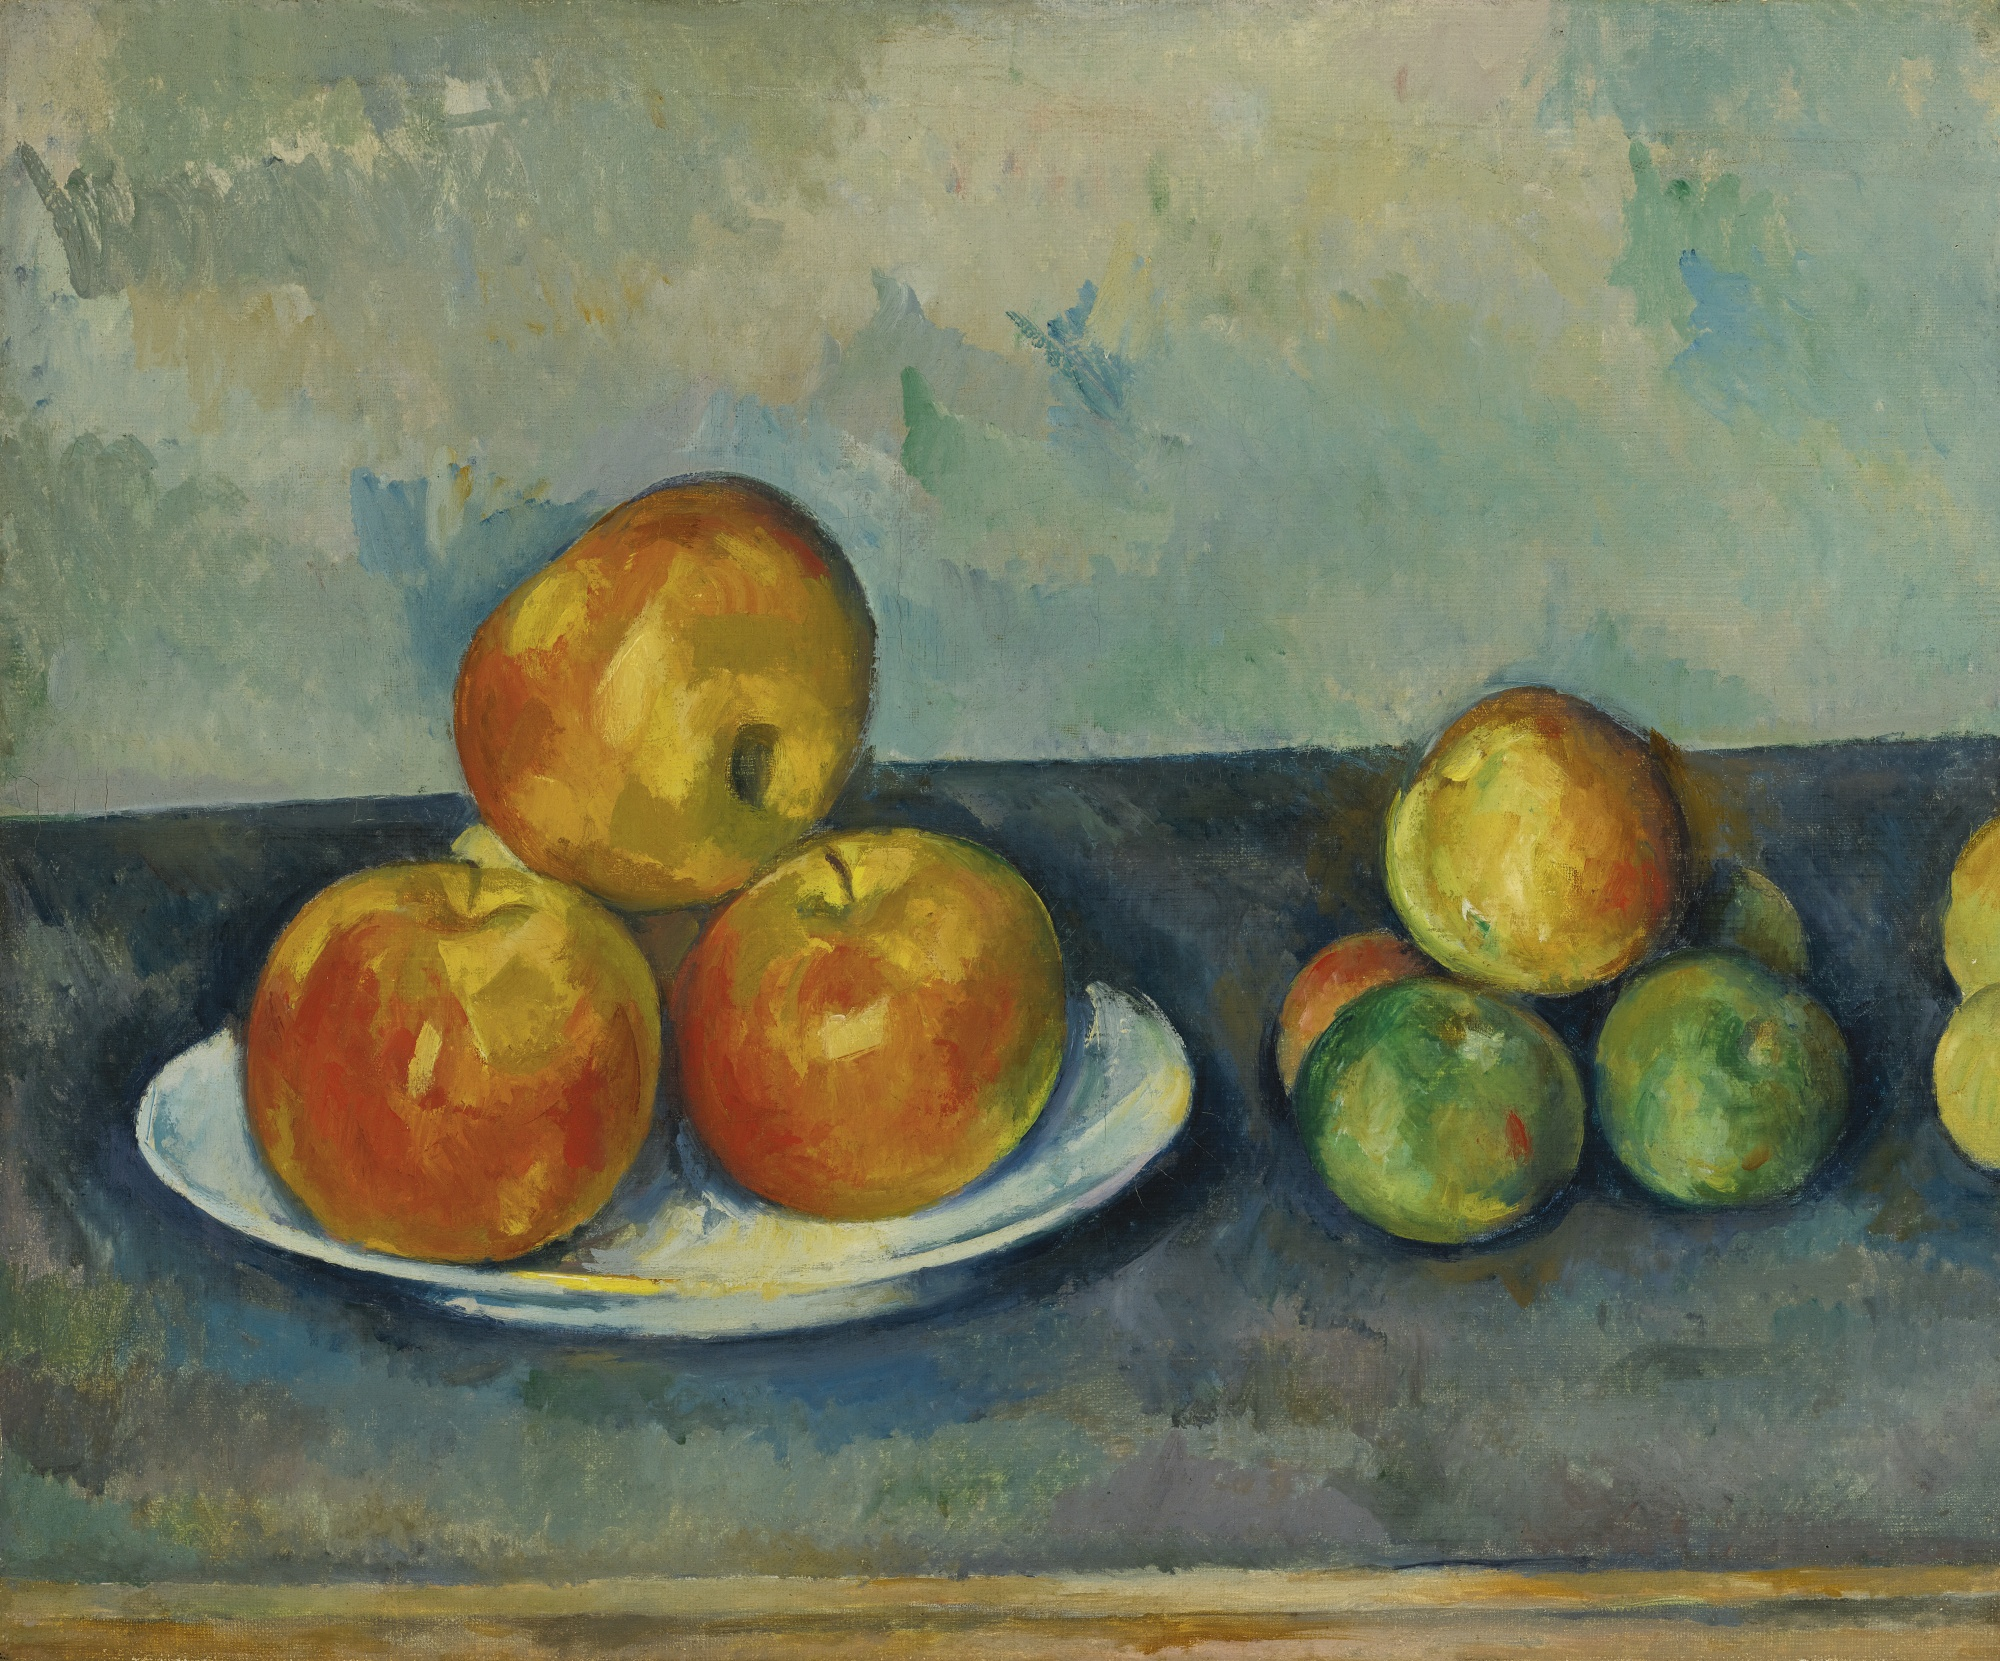



gdrive/MyDrive/ai/test/Cezanne02.jpg


('Impressionist', tensor(1), tensor([4.8465e-05, 9.9995e-01]))


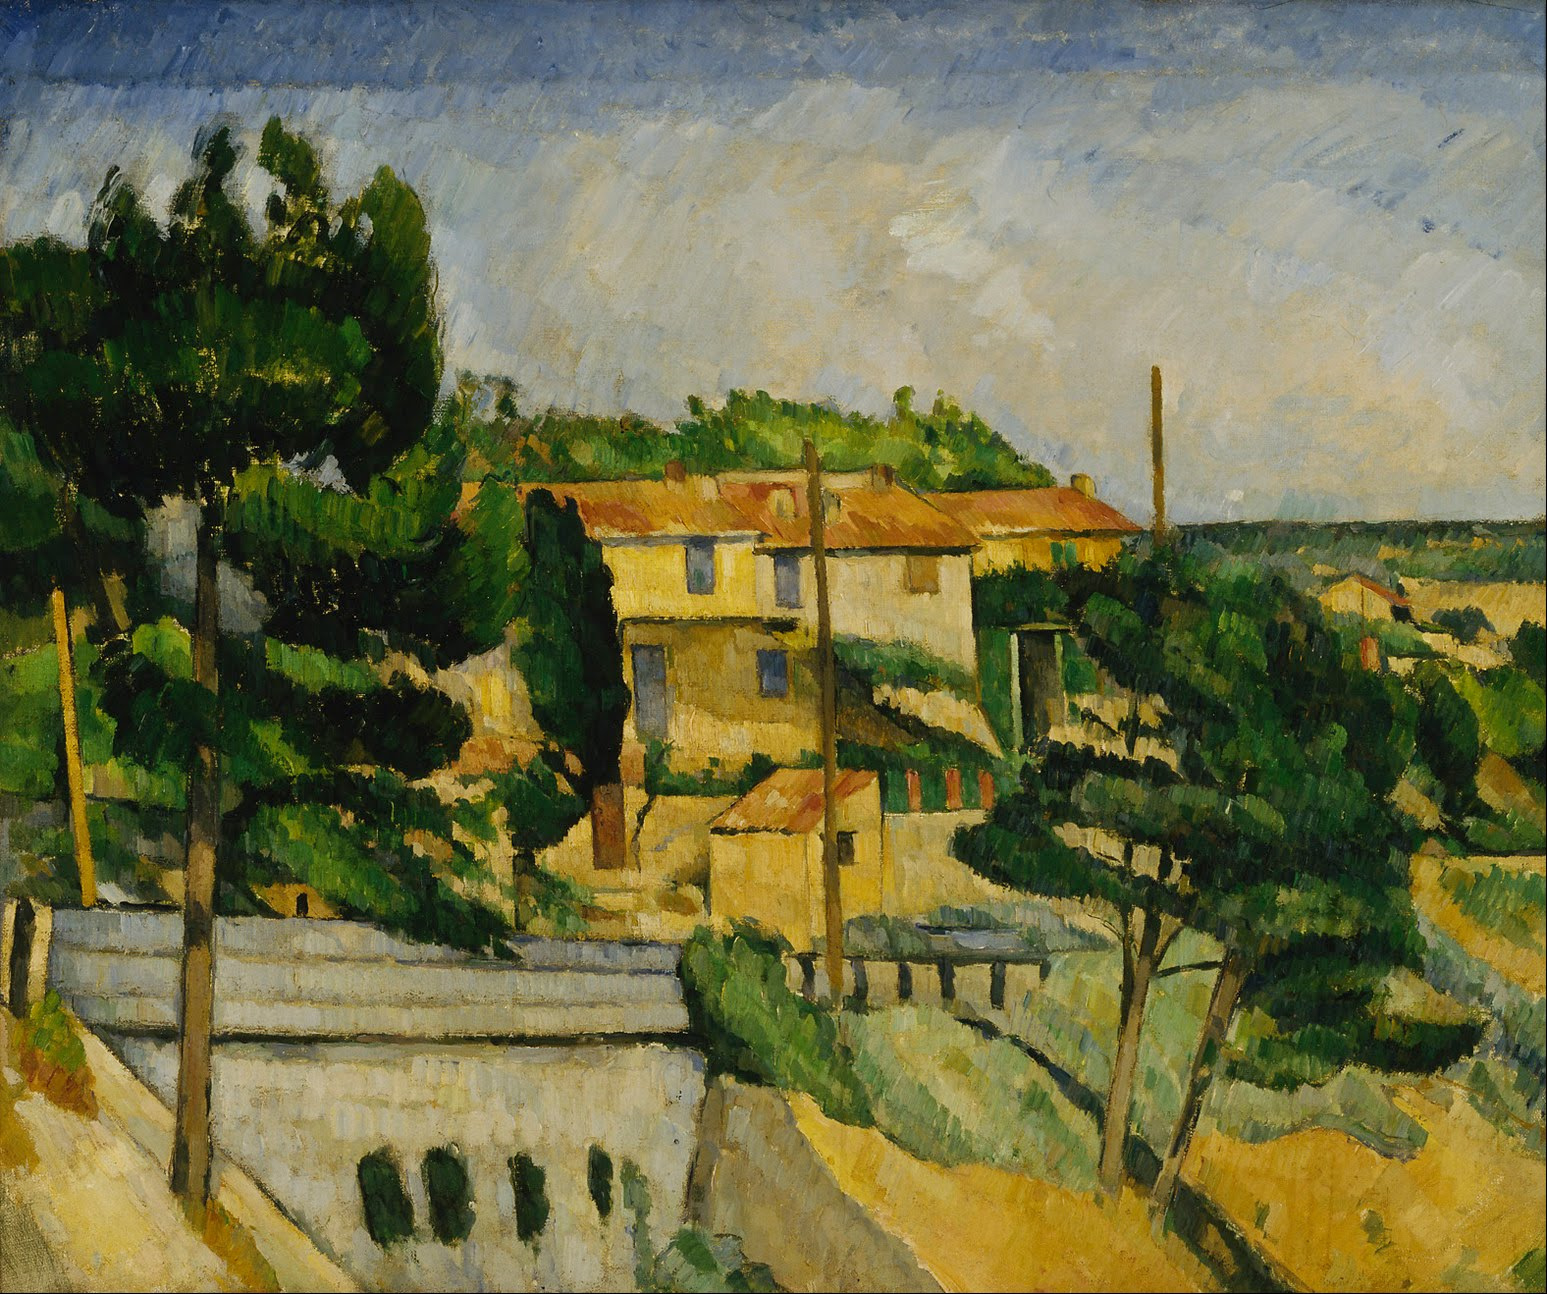



gdrive/MyDrive/ai/test/Cezanne01.jpg


('Impressionist', tensor(1), tensor([3.5670e-05, 9.9996e-01]))


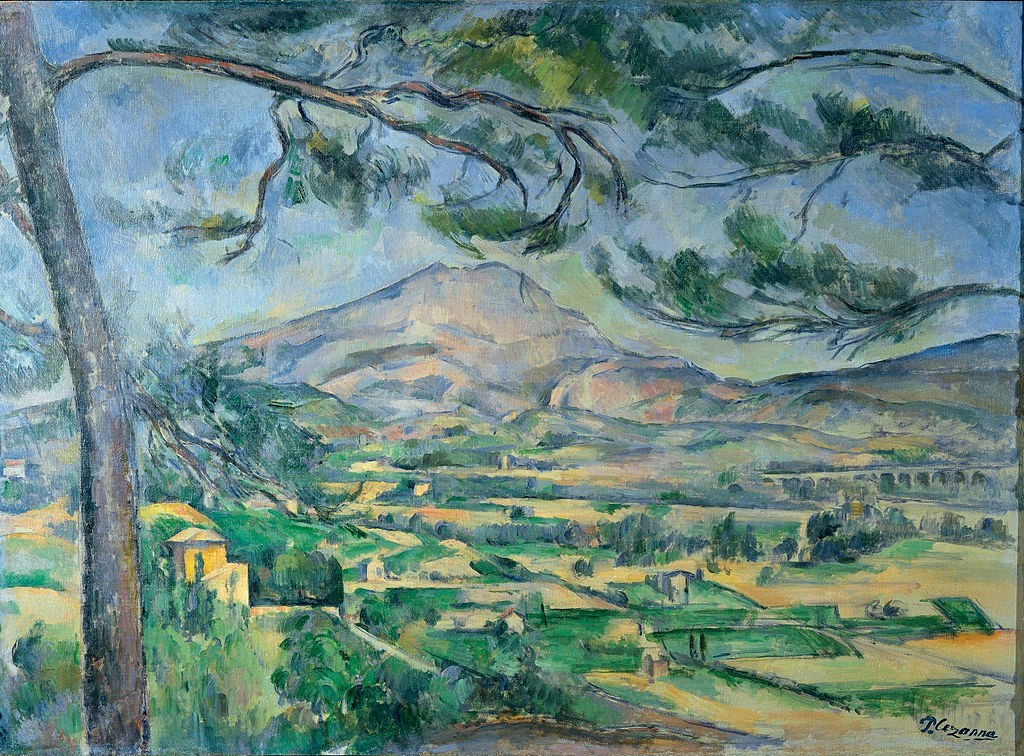



gdrive/MyDrive/ai/test/Renoir04.jpg


('Impressionist', tensor(1), tensor([0.3992, 0.6008]))


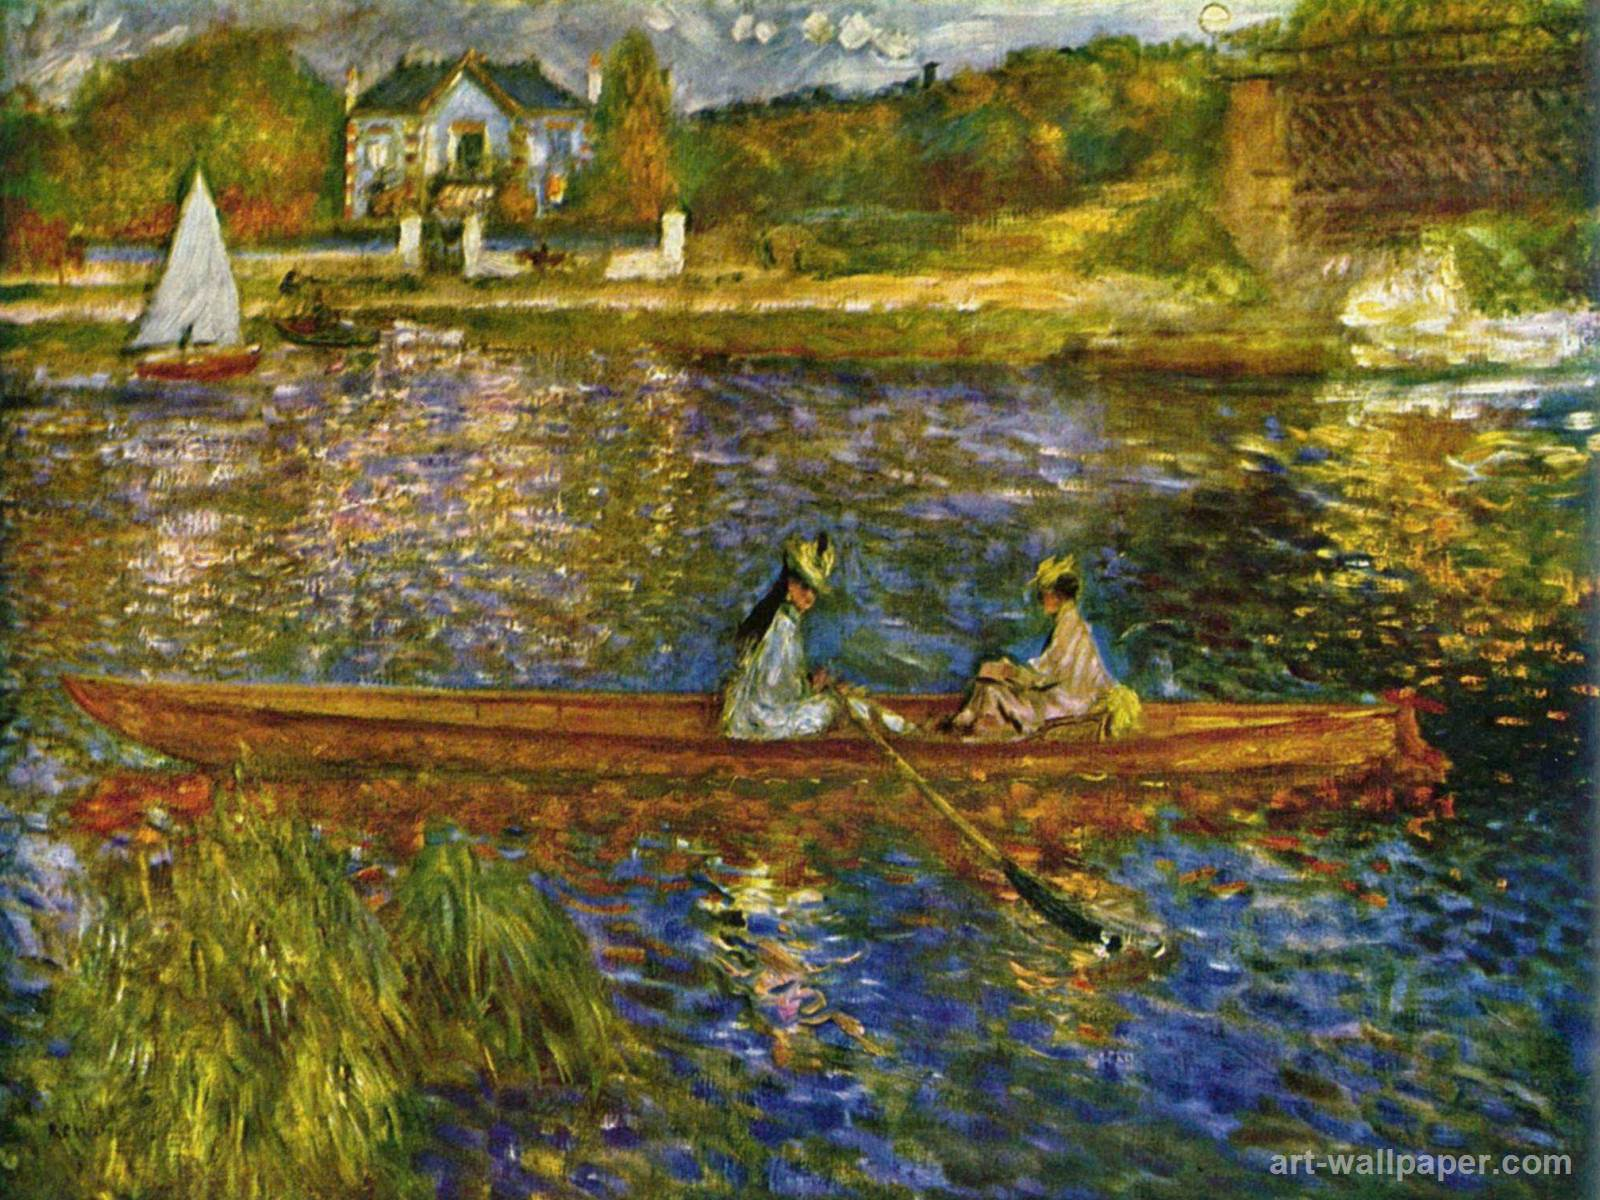



gdrive/MyDrive/ai/test/Renoir01.jpg


('Baroque', tensor(0), tensor([0.9964, 0.0036]))


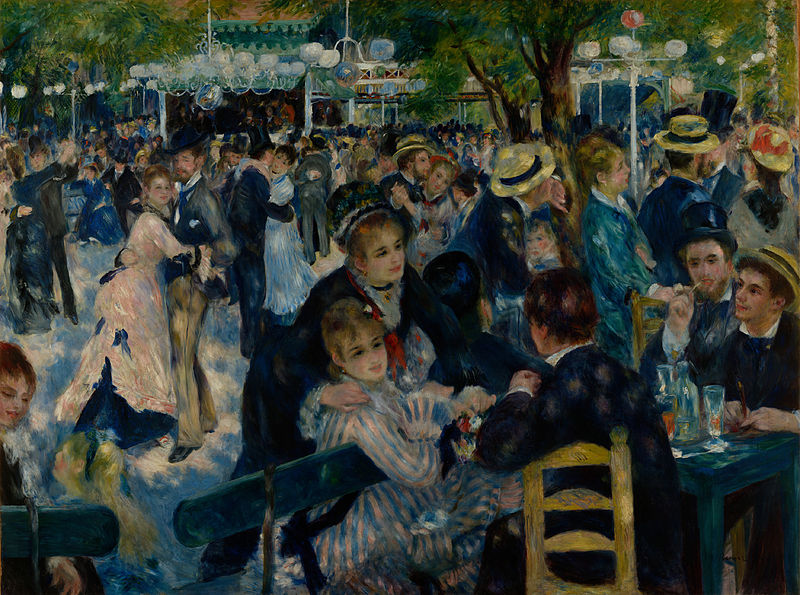



gdrive/MyDrive/ai/test/Renoir03.jpg


('Impressionist', tensor(1), tensor([0.0029, 0.9971]))


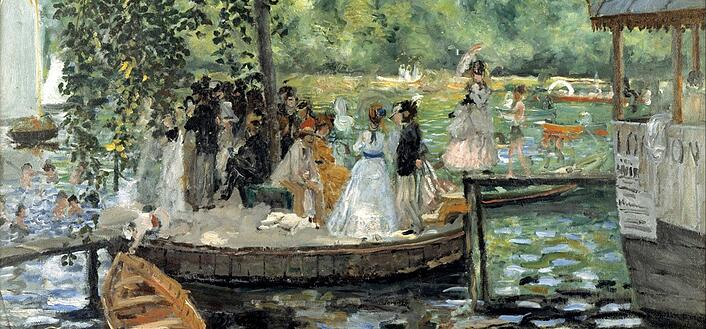



gdrive/MyDrive/ai/test/Cezanne04.jpg


('Impressionist', tensor(1), tensor([0.0078, 0.9922]))


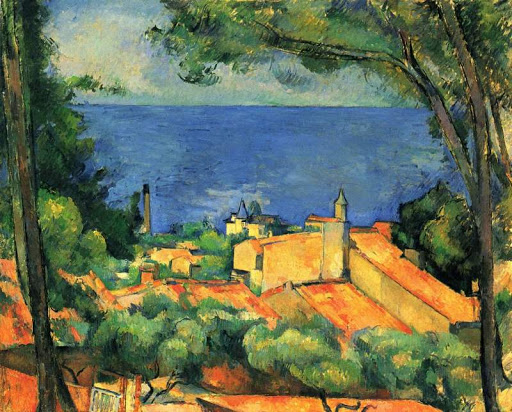



gdrive/MyDrive/ai/test/Velazquez01.jpg


('Baroque', tensor(0), tensor([9.9969e-01, 3.1435e-04]))


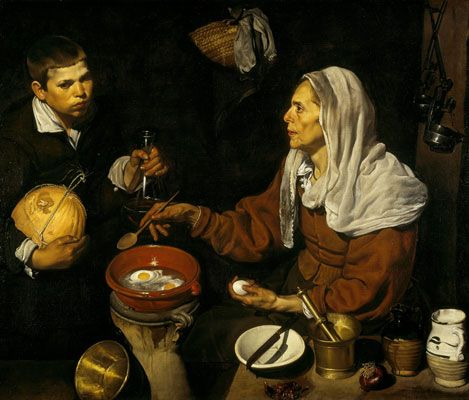



gdrive/MyDrive/ai/test/Bernini03.jpg


('Baroque', tensor(0), tensor([1.0000e+00, 2.0456e-07]))


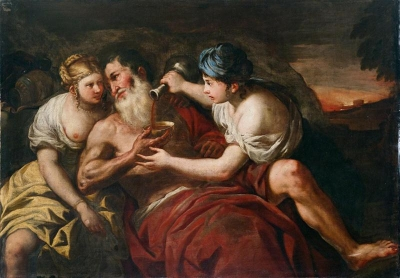



gdrive/MyDrive/ai/test/Bernini04.jpg


('Baroque', tensor(0), tensor([9.9961e-01, 3.9238e-04]))


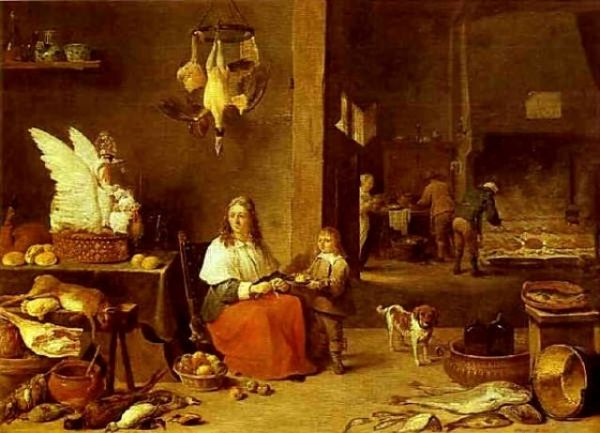

In [ ]:
directory = 'gdrive/MyDrive/ai/test'
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        print(os.path.join(directory, filename))
        print (learn_inf.predict(os.path.join(directory, filename)))
        display(Image(os.path.join(directory, filename),width = 256))
        print ("\r\n")
    else:
        continue